<!-- ![title](./Desktop/tokyo-wallpaper.jpg) -->

# SUPERVISED LEARNING (log square)
- by Giovaldi R C

Salah satu metode sklearn untuk mengatasi Outliers adalah log & square dengan FunctionTransformer. Dua metode ini saya gunakan karena, ada beberapa kondisi yang mana harus menggunakan salah satunya. Hal ini tergantung kepada bentuk skew yang dihasilkan dari setiap data/kolom. Berdasarkan kutipan dari Prof. James Kirchner (UC Berkeley) yang saya baca, disebutkan bahwa.

# " if the data are right-skewed (clustered at lower values) move down the ladder of powers (that is, try square root, cube root, logarithmic, etc. transformations). If the data are left-skewed (clustered at higher values) move up the ladder of powers (cube, square)."
- http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_03.pdf

# Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# import pickle
import joblib
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer,FunctionTransformer
from sklearn.compose import ColumnTransformer
from feature_engine.outlier_removers import Winsorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from collections import Counter
import scipy.stats as ss
import math
from xgboost import XGBRegressor

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)
%matplotlib inline

In [2]:
print('numpy version:', np.__version__,'per Agustus 2020')
print('pandas version:', pd.__version__,'per Agustus 2020')
print('scikit-learn version:', sklearn.__version__,'per Agustus 2020')

numpy version: 1.19.1 per Agustus 2020
pandas version: 1.1.0 per Agustus 2020
scikit-learn version: 0.23.1 per Agustus 2020


In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

# Import Data

In [4]:
airbnbl = pd.read_csv('./Desktop/airbnb__1.csv')

In [5]:
airbnbl.head()

,host_id,name,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,host_since,property_type,room_type,amenities,license,instant_bookable,cancellation_policy,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,longitude,latitude,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people
0,151977,"La Casa Gaienmae C Harajuku, Omotesando is nearby",f,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Shibuya Ku,2010-06-25,Apartment,Private room,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...,f,strict_14_with_grace_period,0.18,94.0,89,1,1.0,1.0,1,139.71203,35.67152,100.0,96.488942,4192.0,30000.0,5000.0,0.0
1,964081,Oshiage Holiday Apartment,t,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Sumida Ku,2011-08-13,Apartment,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",M130003350,f,moderate,1.56,95.0,270,1,2.0,1.0,2,139.82596,35.71721,86.0,100.000000,10965.0,40000.0,5000.0,0.0
2,341577,Private apt in central Tokyo #203,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,Nerima Ku,2011-01-10,Apartment,Entire home/apt,"{TV,Wifi,""Air conditioning"",Kitchen,""Hot tub"",...",Other reasons | 1か月以上の賃貸借契約のみ対応とする。ゲストには賃貸契約の署...,f,strict_14_with_grace_period,1.17,95.0,242,1,1.0,1.0,2,139.65810,35.74267,82.0,100.000000,4192.0,32250.0,5375.0,1075.0
3,1573631,"Cozy flat #203, local area YET 10 mins to shib...",t,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Setagaya Ku,2012-01-06,Apartment,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Other reasons | We called Setagaya ku hokenjo ...,f,moderate,1.37,95.0,364,1,1.0,0.0,2,139.65707,35.66443,92.0,100.000000,6987.0,20000.0,6000.0,0.0
4,341577,Private apt in central Tokyo #201,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,Nerima Ku,2011-01-10,Apartment,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Other reasons | 1か月以上の賃貸借契約のみ対応とする。ゲストには賃貸契約の署...,f,strict_14_with_grace_period,1.12,96.0,353,1,1.0,1.0,2,139.65832,35.74264,82.0,100.000000,3977.0,32250.0,5375.0,1075.0


In [6]:
airbnbl.shape 

(12600, 28)

In [7]:
airbnbl.columns

Index(['host_id', 'name', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_since',
       'property_type', 'room_type', 'amenities', 'license',
       'instant_bookable', 'cancellation_policy', 'reviews_per_month',
       'review_scores_rating', 'availability_365', 'guests_included', 'beds',
       'bedrooms', 'accommodates', 'longitude', 'latitude',
       'host_acceptance_rate', 'host_response_rate', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people'],
      dtype='object')

In [8]:
airbnb_describe =[]

for i in airbnbl.columns:
    airbnb_describe.append([
        i,
        airbnbl[i].dtypes,
        airbnbl[i].isna().sum(),
        round((((airbnbl[i].isna().sum())/(len(airbnbl)))*100),2),
        airbnbl[i].nunique(),
        airbnbl[i].unique()
    ])

In [9]:
DESC = pd.DataFrame(airbnb_describe, columns=['column','type','nan','nan%','nunique','unique'])
DESC

,column,type,nan,nan%,nunique,unique
0,host_id,int64,0,0.0,3236,"[151977, 964081, 341577, 1573631, 4799233, 484..."
1,name,object,0,0.0,11669,"[La Casa Gaienmae C Harajuku, Omotesando is ne..."
2,host_is_superhost,object,0,0.0,2,"[f, t]"
3,host_verifications,object,0,0.0,203,"[['email', 'phone', 'facebook', 'reviews', 'ju..."
4,host_identity_verified,object,0,0.0,2,"[t, f]"
5,neighbourhood_cleansed,object,0,0.0,55,"[Shibuya Ku, Sumida Ku, Nerima Ku, Setagaya Ku..."
6,host_since,object,0,0.0,1638,"[2010-06-25, 2011-08-13, 2011-01-10, 2012-01-0..."
7,property_type,object,0,0.0,28,"[Apartment, House, Serviced apartment, Condomi..."
8,room_type,object,0,0.0,4,"[Private room, Entire home/apt, Shared room, H..."
9,amenities,object,0,0.0,9182,"[{TV,Internet,Wifi,Kitchen,""Paid parking off p..."


In [10]:
airbnb= airbnbl[(airbnbl['availability_365']<=180)&(airbnbl['availability_365']!=0)]

In [11]:
airbnb.dtypes

host_id                     int64
name                       object
host_is_superhost          object
host_verifications         object
host_identity_verified     object
neighbourhood_cleansed     object
host_since                 object
property_type              object
room_type                  object
amenities                  object
license                    object
instant_bookable           object
cancellation_policy        object
reviews_per_month         float64
review_scores_rating      float64
availability_365            int64
guests_included             int64
beds                      float64
bedrooms                  float64
accommodates                int64
longitude                 float64
latitude                  float64
host_acceptance_rate      float64
host_response_rate        float64
price                     float64
security_deposit          float64
cleaning_fee              float64
extra_people              float64
dtype: object

# HANDLING OUTLIERS

## Discover outliers with visualization tools : 
  - Box plot =  is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.
  - Histogram

## Working with Outliers: Correcting, Removing, Leave it
  
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

https://www.udemy.com/course/feature-engineering-for-machine-learning/learn/lecture/8749894#announcements

https://www.slideshare.net/rizka_safa/momen-kemiringan-dankeruncingan7

http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_03.pdf

In [12]:
airbnb.skew()

host_id                 -0.106253
reviews_per_month        2.590106
review_scores_rating    -2.784883
availability_365        -0.162022
guests_included          2.492380
beds                     5.446727
bedrooms                13.273677
accommodates             1.645852
longitude               -2.233014
latitude               -17.016600
host_acceptance_rate    -5.328615
host_response_rate      -5.698404
price                   12.643910
security_deposit        11.368452
cleaning_fee             2.350679
extra_people             4.650069
dtype: float64

In [13]:
airbnb.kurt()

host_id                  -1.265011
reviews_per_month        23.526141
review_scores_rating     13.857967
availability_365         -1.017524
guests_included           9.369917
beds                     75.405336
bedrooms                386.730254
accommodates              2.839425
longitude                12.125590
latitude                427.891348
host_acceptance_rate     38.295208
host_response_rate       37.909600
price                   205.558677
security_deposit        164.933897
cleaning_fee             14.885028
extra_people             71.234601
dtype: float64

In [19]:
def diagnostic_plots(airbnb,variabel): # fungsi def untuk memplot istribusi kolom di dataset airbnb
    #ukuran
    plt.figure(figsize=(32,10)) #ukuran kesamping dan kebawah
    #histogram
    plt.subplot(1,2,1) #row, kolom, index
    sns.distplot(airbnb[variabel],bins=30) #distplot untuk memplot distribusi univariate dengan interval dibagi 30
    plt.title("Histogram") #titel/judul
    # Boxplot
    plt.subplot(1,2,2)#row,kolom,index
    sns.boxplot(y=airbnb[variabel]) #menggunakan plot boxplot 
    plt.title("Boxplot") #titel/judul
    
    plt.show() #mengeluarkan

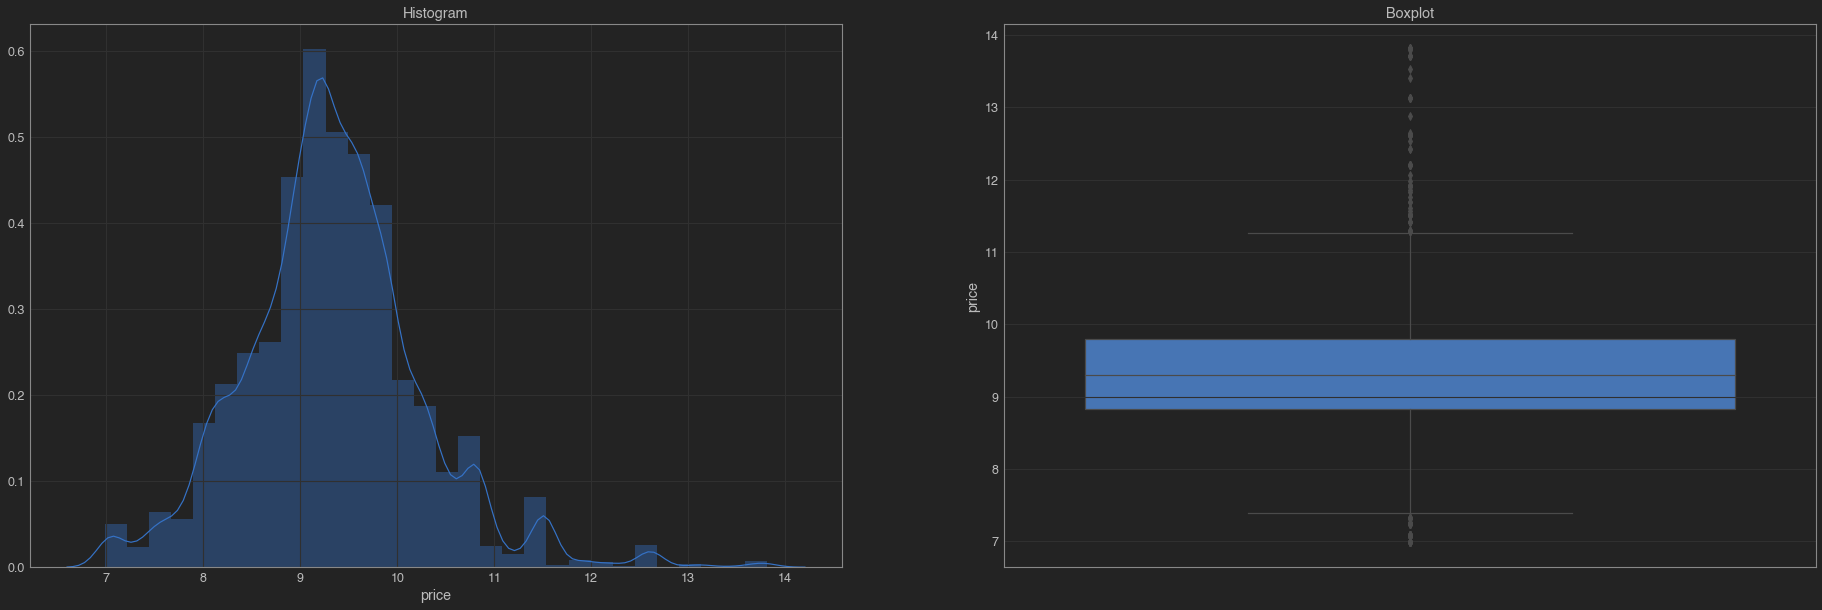

In [20]:
diagnostic_plots(airbnb,'price')

In [21]:
airbnb['price'] = FunctionTransformer(np.log1p).fit_transform(airbnb[['price']])

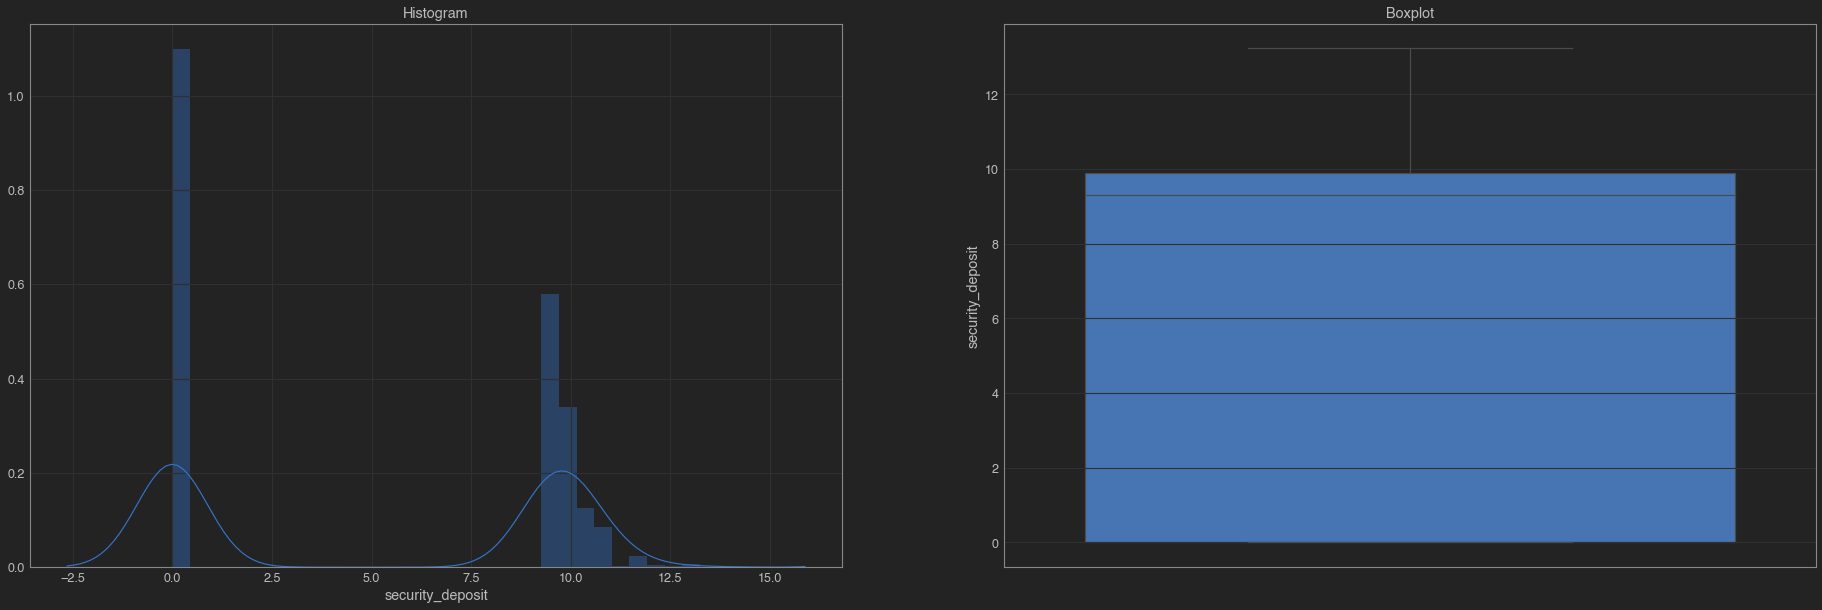

In [22]:
diagnostic_plots(airbnb,'security_deposit')

In [23]:
airbnb['security_deposit'] = FunctionTransformer(np.log1p).fit_transform(airbnb[['security_deposit']])

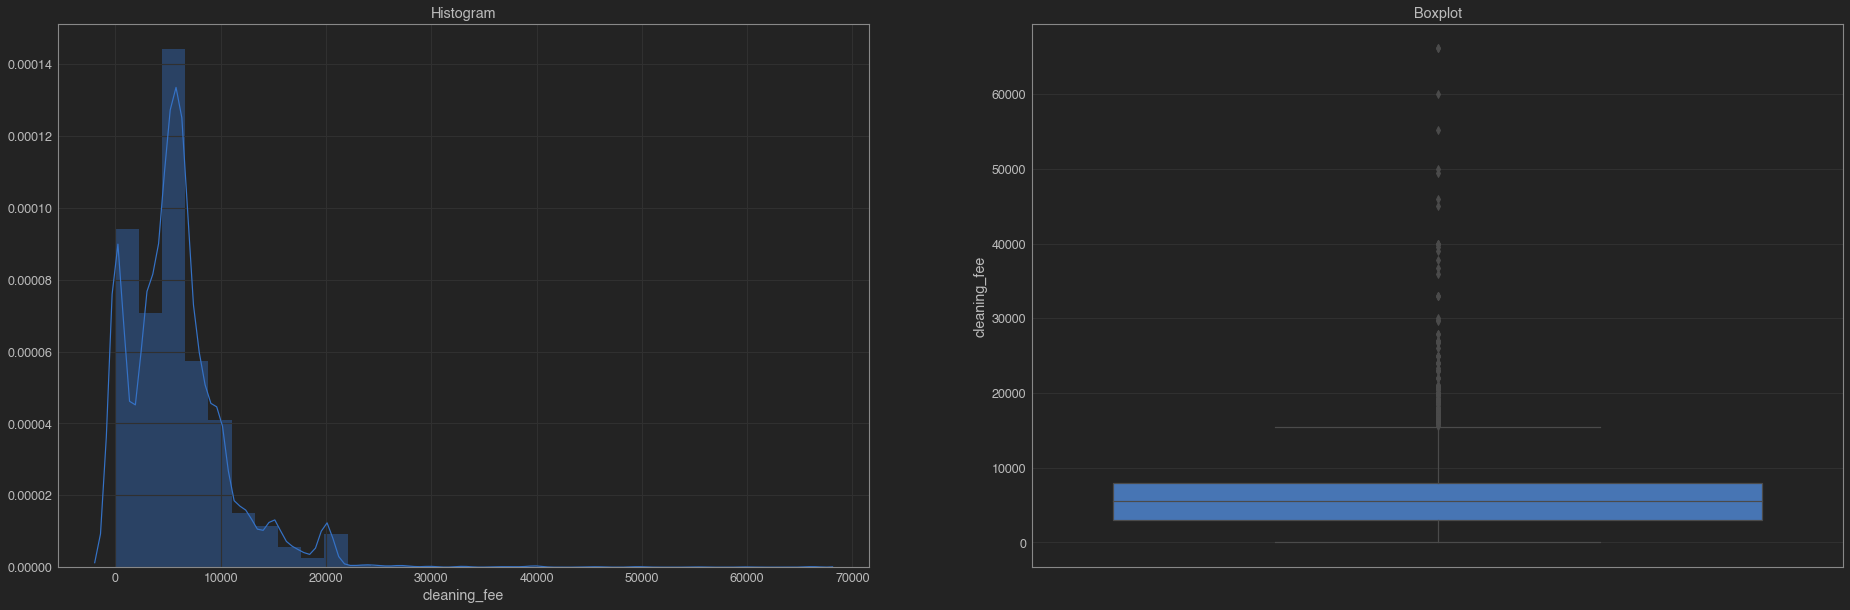

In [24]:
diagnostic_plots(airbnb,'cleaning_fee')

In [25]:
airbnb['cleaning_fee'] = FunctionTransformer(np.log1p).fit_transform(airbnb[['cleaning_fee']])

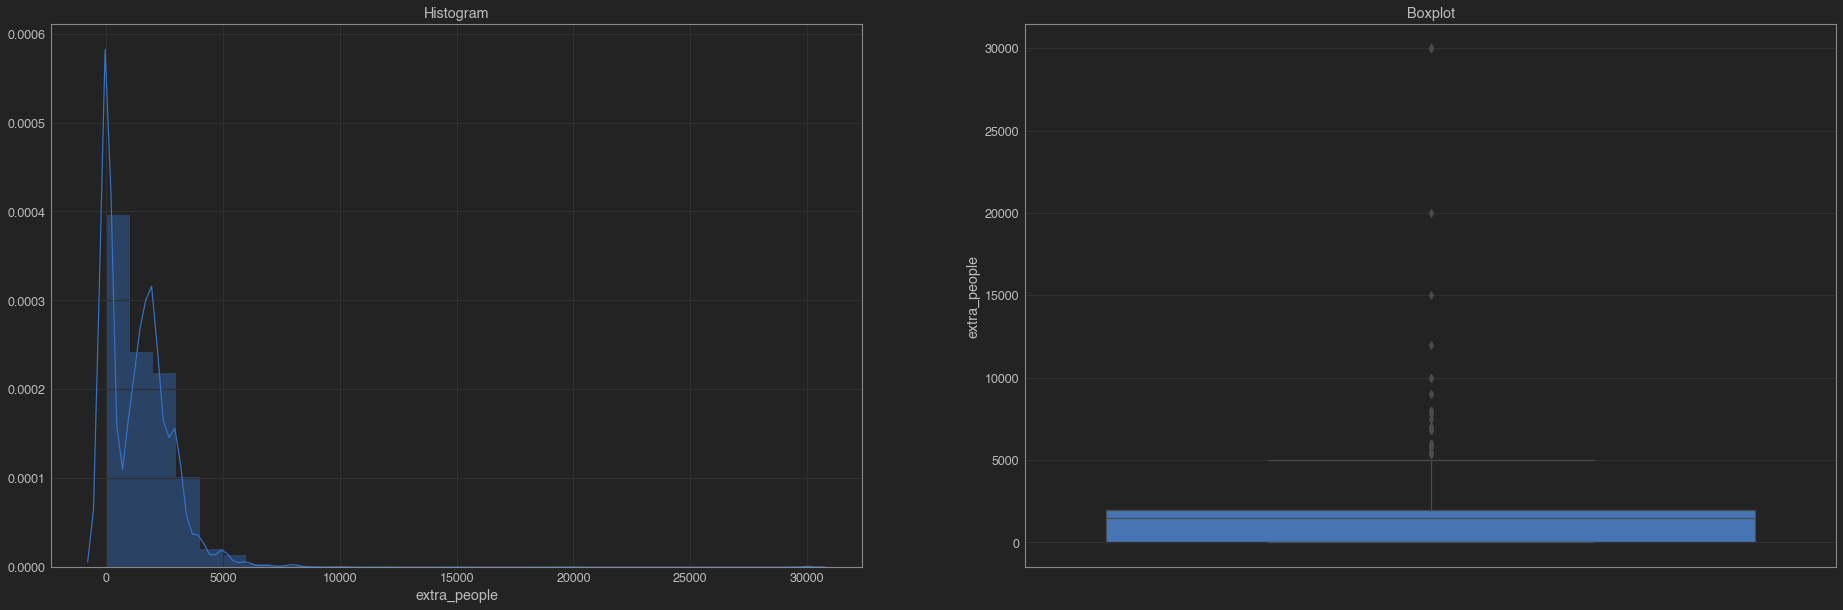

In [26]:
diagnostic_plots(airbnb,'extra_people')

In [27]:
airbnb['extra_people'] = PowerTransformer().fit_transform(airbnb[['extra_people']])

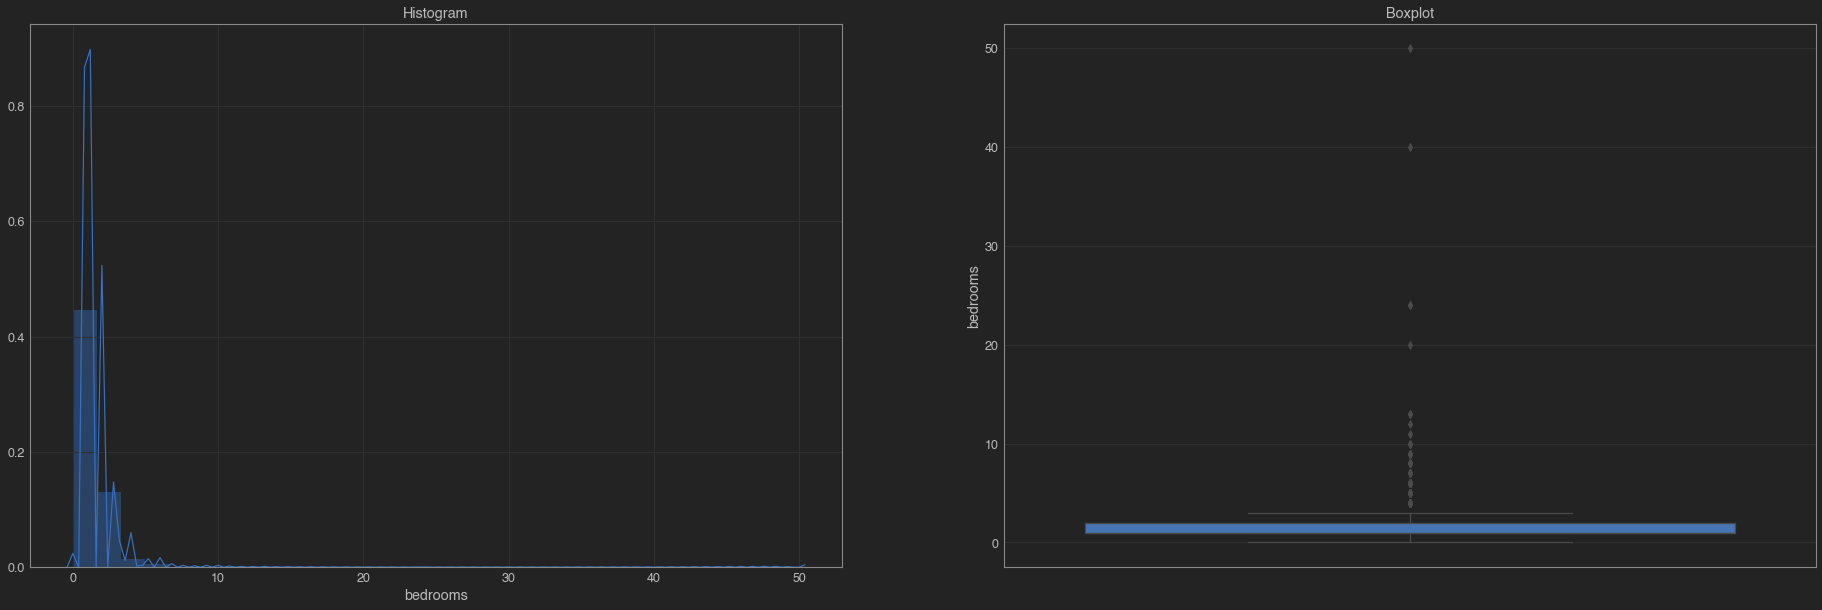

In [28]:
diagnostic_plots(airbnb,'bedrooms')

In [29]:
airbnb['bedrooms'] = FunctionTransformer(np.log1p).fit_transform(airbnb[['bedrooms']])

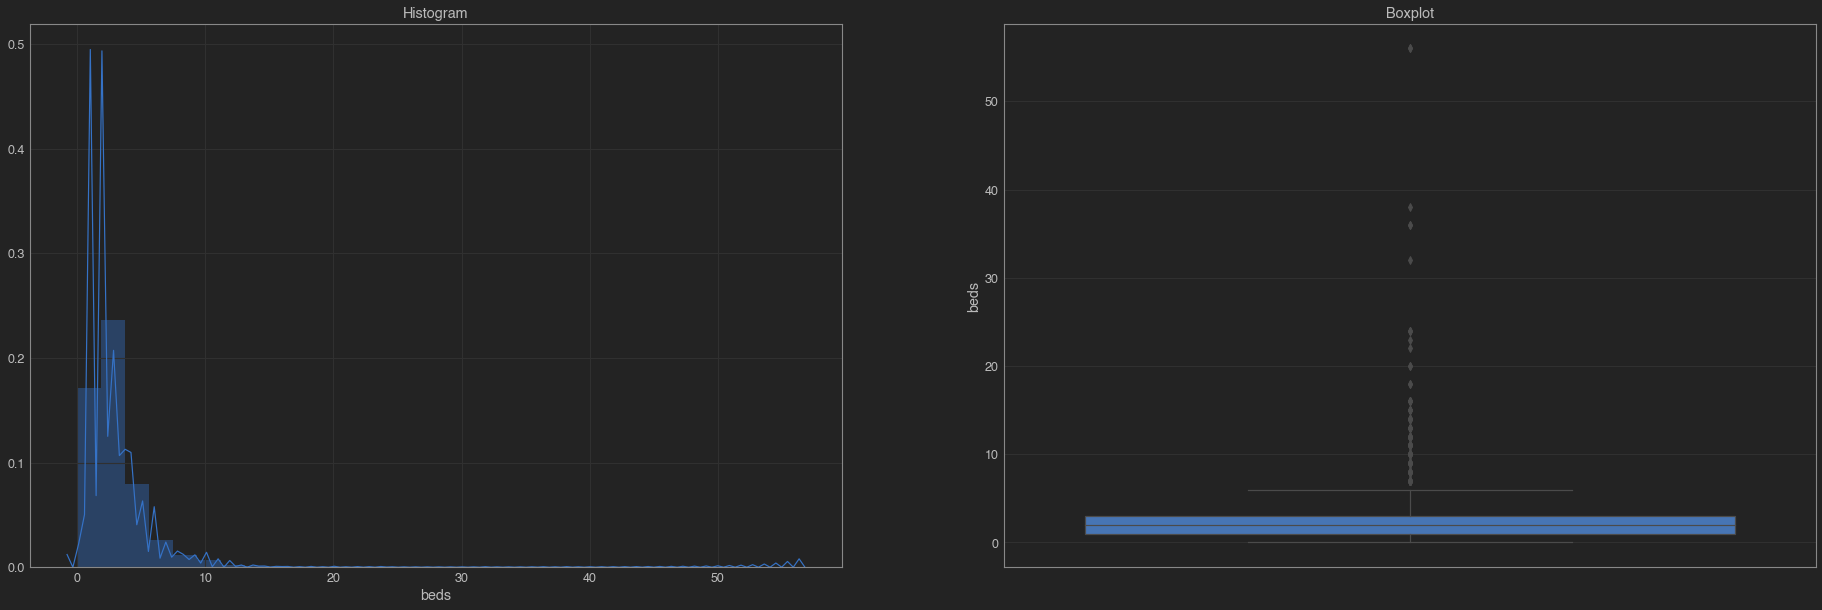

In [30]:
diagnostic_plots(airbnb,'beds')

In [31]:
airbnb['beds'] = FunctionTransformer(np.log1p).fit_transform(airbnb[['beds']])

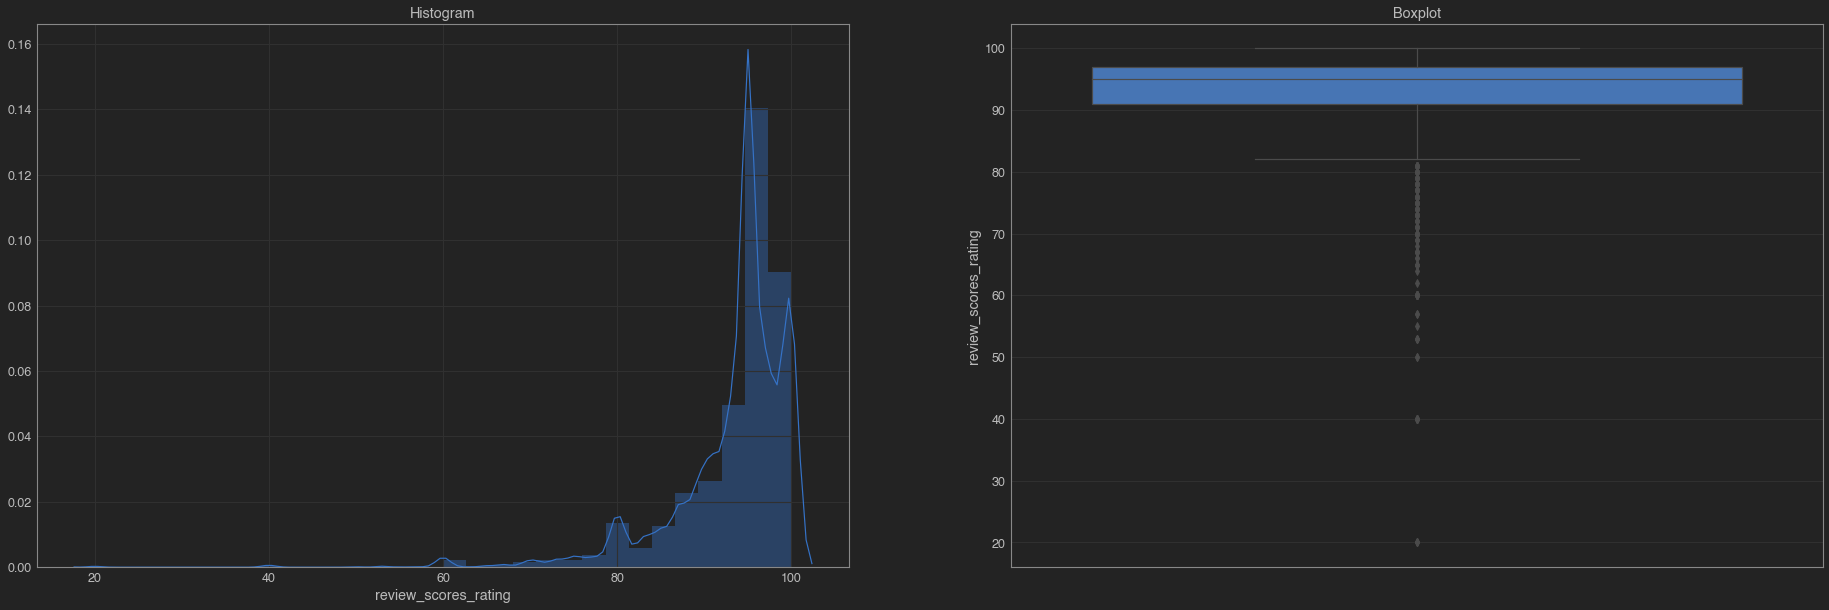

In [32]:
diagnostic_plots(airbnb,'review_scores_rating')

In [33]:
airbnb['review_scores_rating'] = FunctionTransformer(np.square).fit_transform(airbnb[['review_scores_rating']])

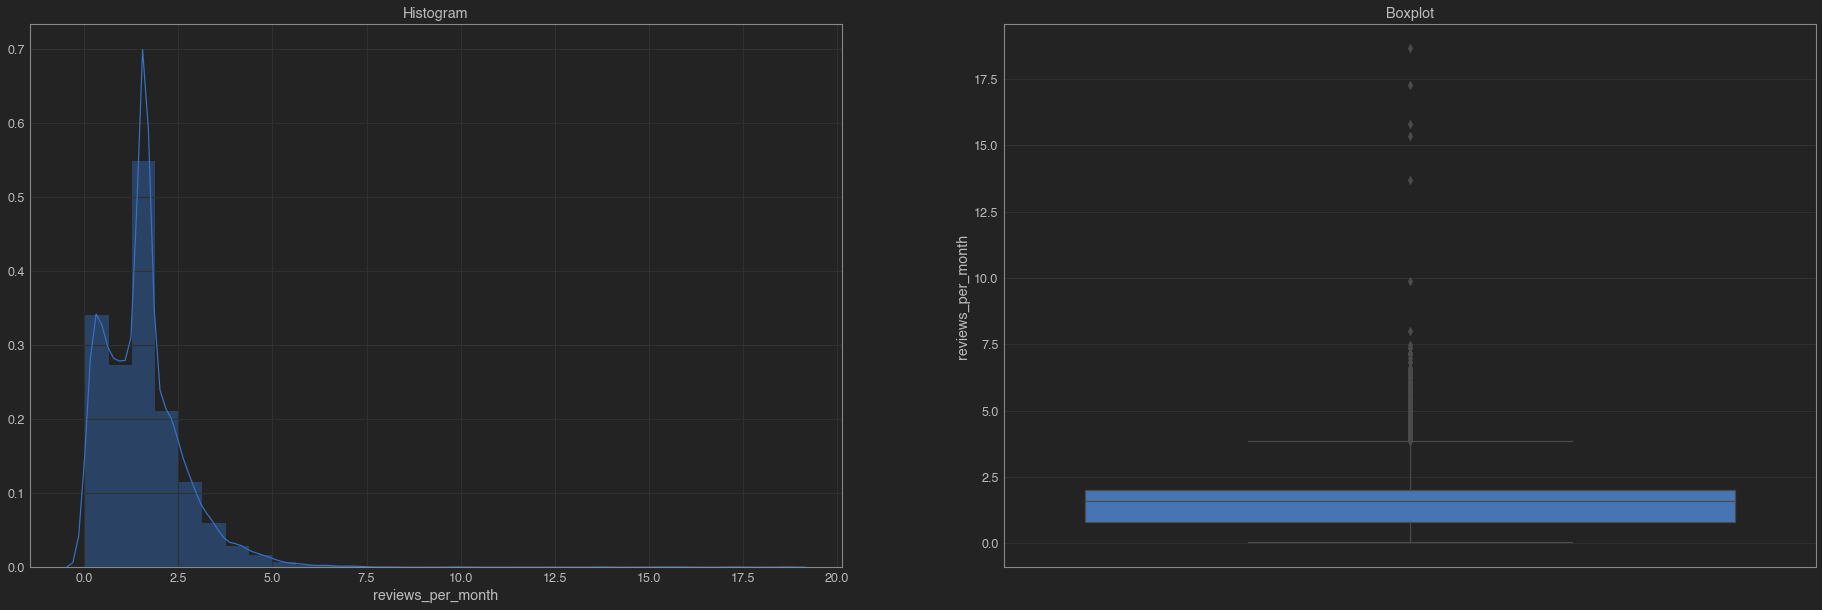

In [34]:
diagnostic_plots(airbnb,'reviews_per_month')

In [35]:
airbnb['reviews_per_month'] = FunctionTransformer(np.log1p).fit_transform(airbnb[['reviews_per_month']])

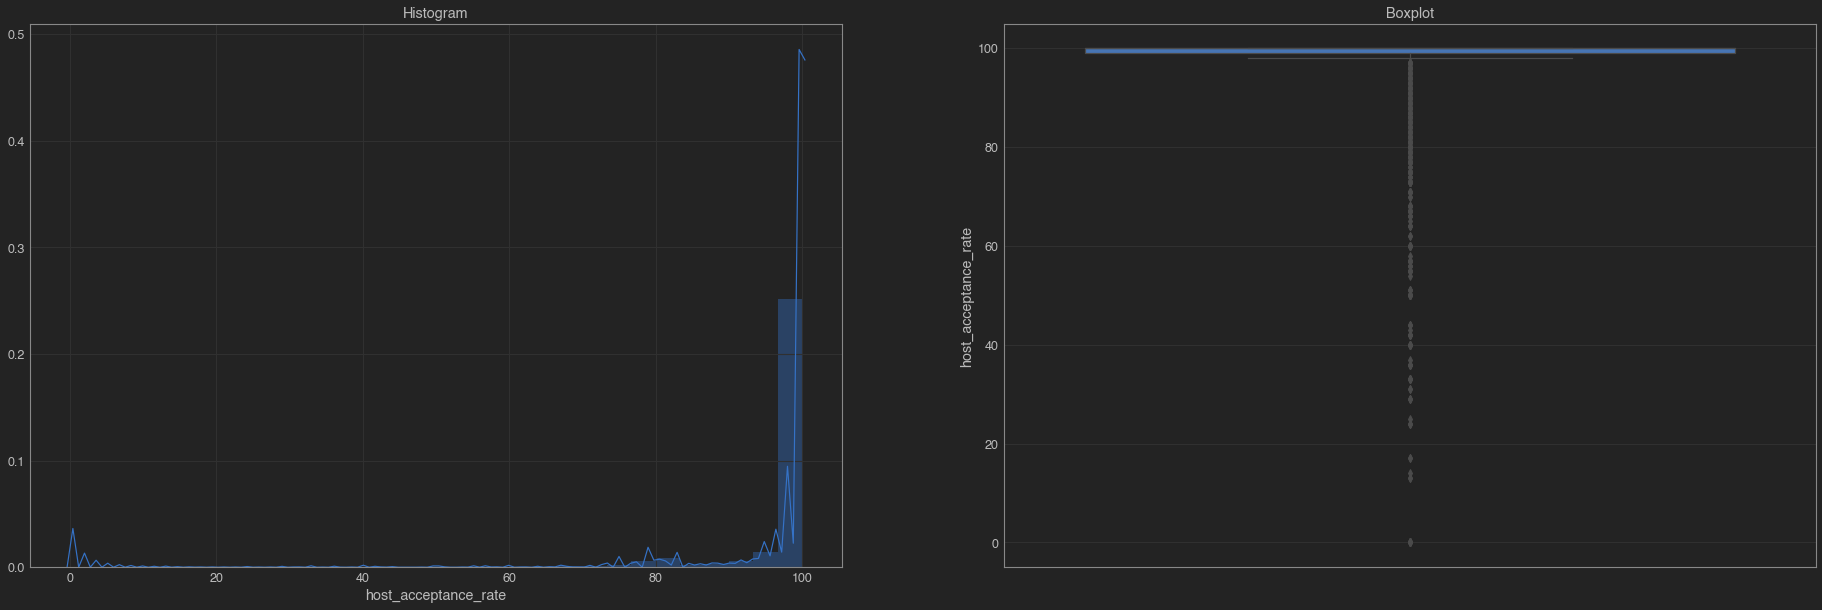

In [36]:
diagnostic_plots(airbnb,'host_acceptance_rate')

In [37]:
airbnb['host_acceptance_rate'] = FunctionTransformer(np.square).fit_transform(airbnb[['host_acceptance_rate']])

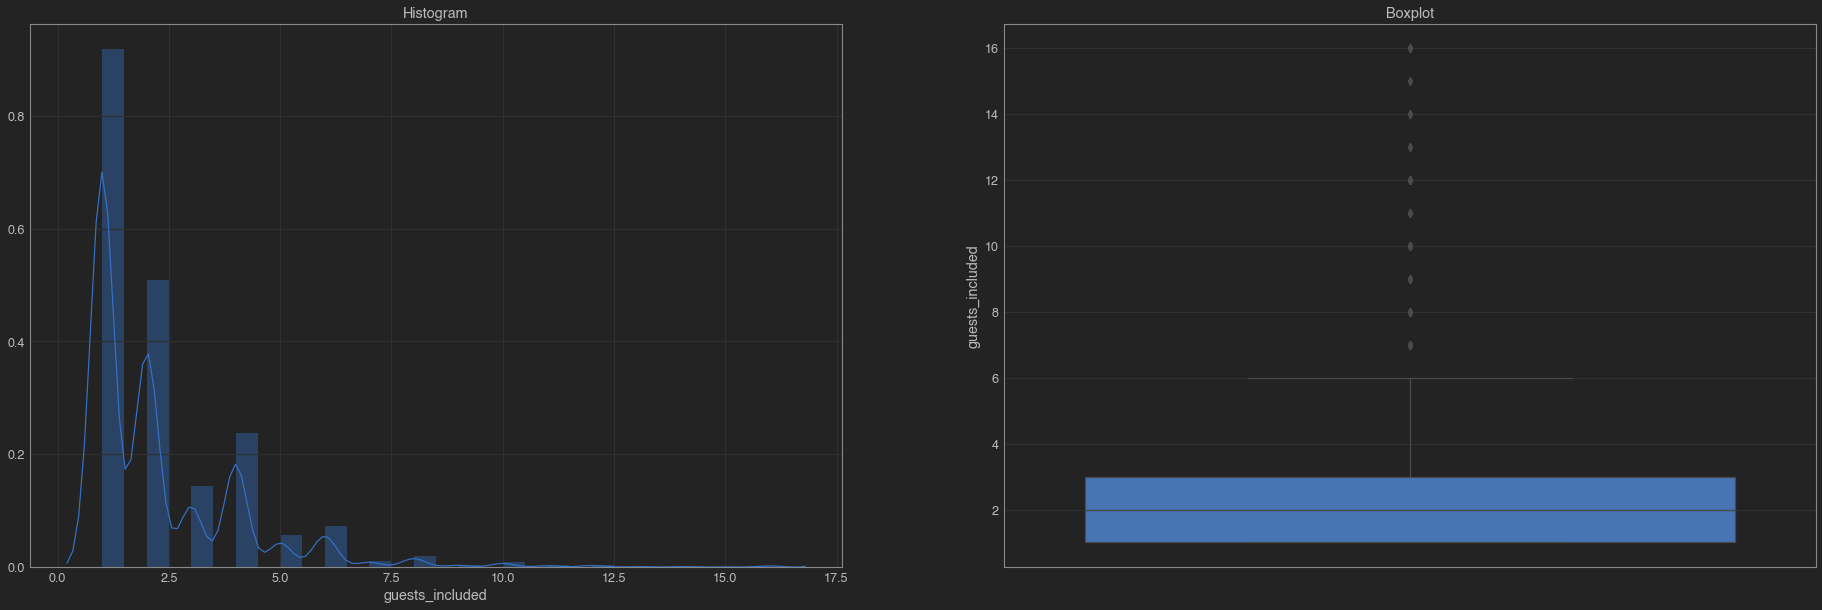

In [38]:
diagnostic_plots(airbnb,'guests_included')

In [39]:
airbnb['guests_included'] = FunctionTransformer(np.log1p).fit_transform(airbnb[['guests_included']])

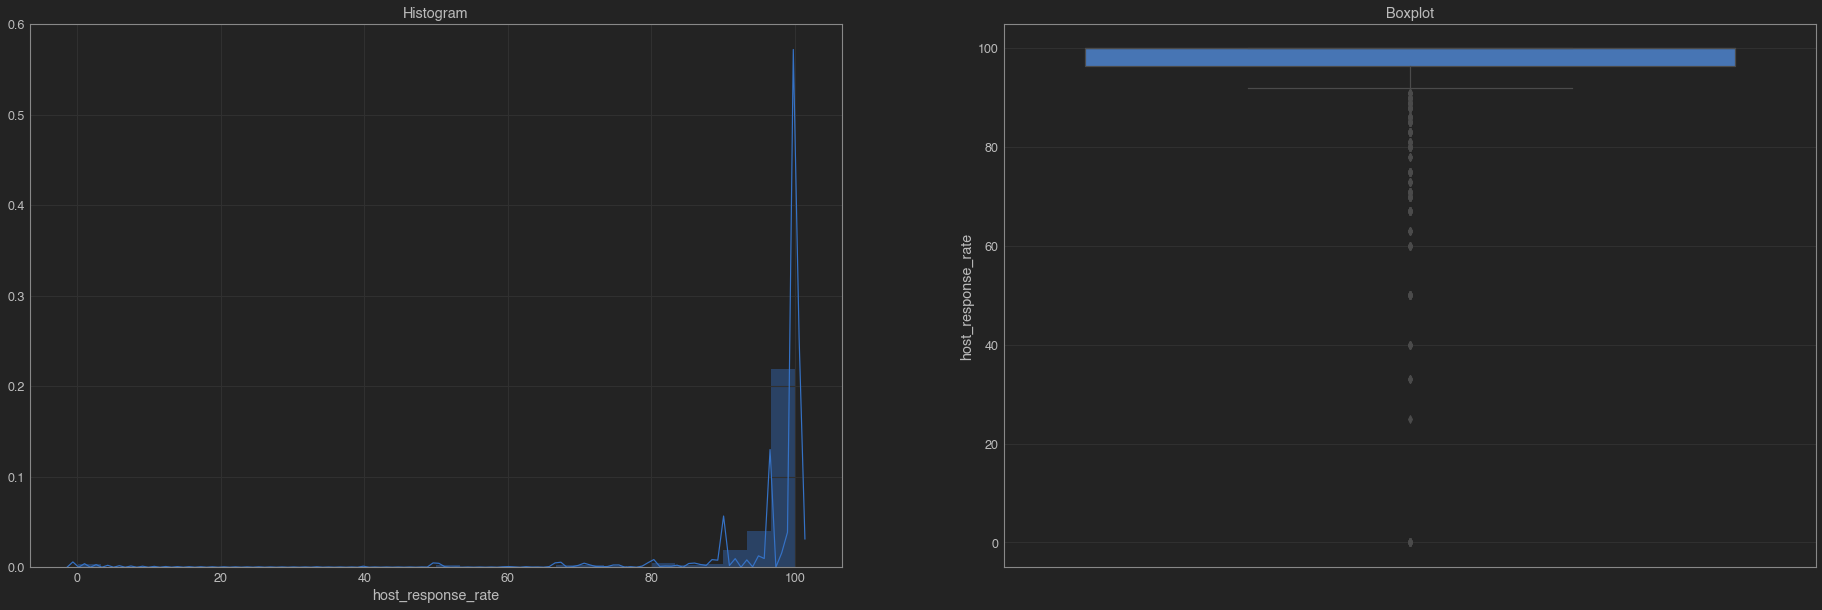

In [40]:
diagnostic_plots(airbnb,'host_response_rate')

In [41]:
airbnb['host_response_rate'] = FunctionTransformer(np.square).fit_transform(airbnb[['host_response_rate']])

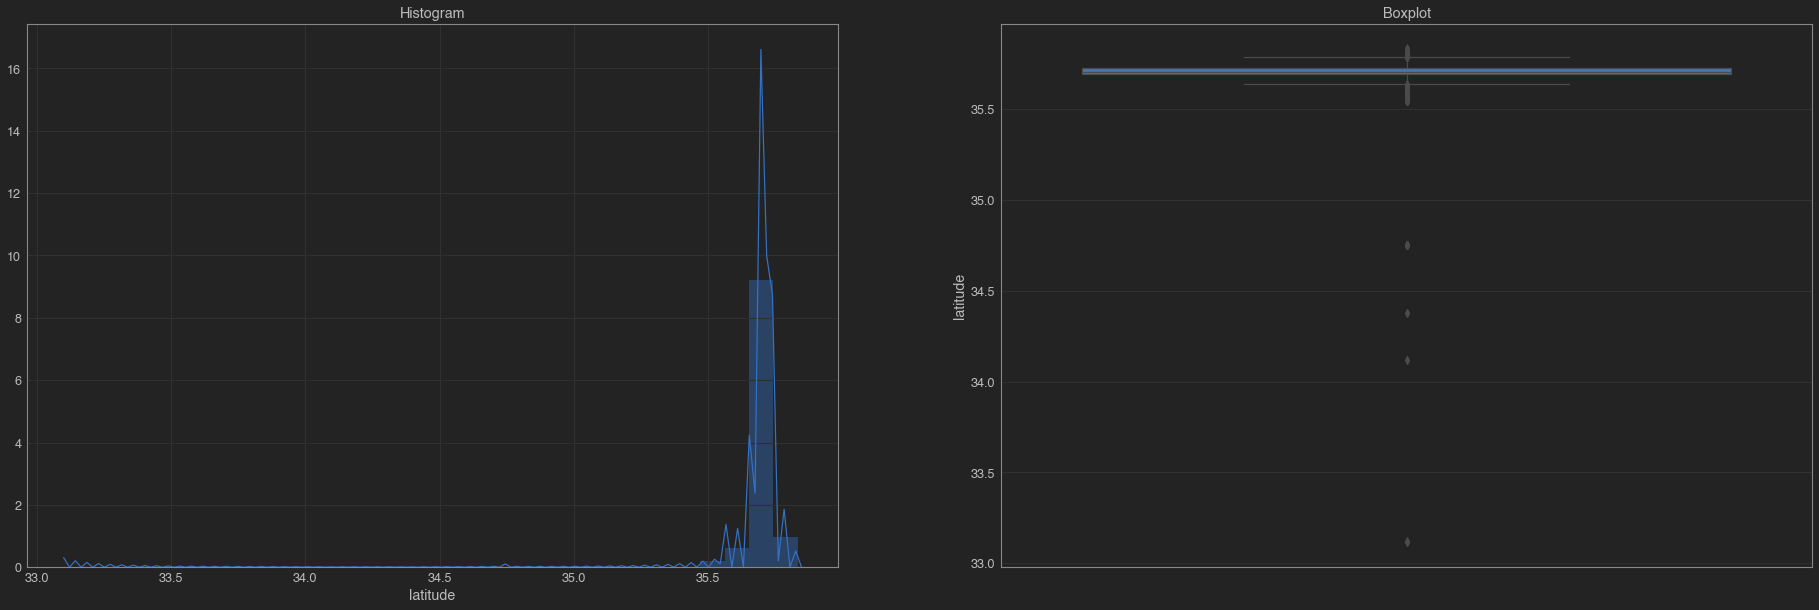

In [42]:
diagnostic_plots(airbnb,'latitude')

In [43]:
airbnb['latitude'] = FunctionTransformer(np.square).fit_transform(airbnb[['latitude']])

In [44]:
airbnb.skew()

host_id                 -0.106253
reviews_per_month        0.016362
review_scores_rating    -1.943465
availability_365        -0.162022
guests_included          0.995911
beds                     0.296801
bedrooms                 0.564580
accommodates             1.645852
longitude               -2.233014
latitude               -16.515198
host_acceptance_rate    -3.681206
host_response_rate      -3.839550
price                    0.126367
security_deposit        -0.058980
cleaning_fee            -1.942087
extra_people            -0.394742
dtype: float64

In [45]:
airbnb.kurt()

host_id                  -1.265011
reviews_per_month         0.044884
review_scores_rating      5.659930
availability_365         -1.017524
guests_included           0.333206
beds                      0.772220
bedrooms                  3.427479
accommodates              2.839425
longitude                12.125590
latitude                405.999448
host_acceptance_rate      7.190268
host_response_rate        7.258658
price                     1.818430
security_deposit         -1.965461
cleaning_fee              2.063141
extra_people             -1.700356
dtype: float64

# FEATURE SELECTION

## Theils_U
Categorical

In [46]:
airbnb.shape

(7526, 28)

In [47]:
airbnb.columns

Index(['host_id', 'name', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_since',
       'property_type', 'room_type', 'amenities', 'license',
       'instant_bookable', 'cancellation_policy', 'reviews_per_month',
       'review_scores_rating', 'availability_365', 'guests_included', 'beds',
       'bedrooms', 'accommodates', 'longitude', 'latitude',
       'host_acceptance_rate', 'host_response_rate', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people'],
      dtype='object')

In [48]:
airbnb.drop(['longitude','latitude'],axis=1,inplace=True)

In [49]:
airbnb.drop(['host_since'],axis=1,inplace=True)

In [51]:
airbnb.drop(['name'],axis=1,inplace=True)

# RECATEGORIZE

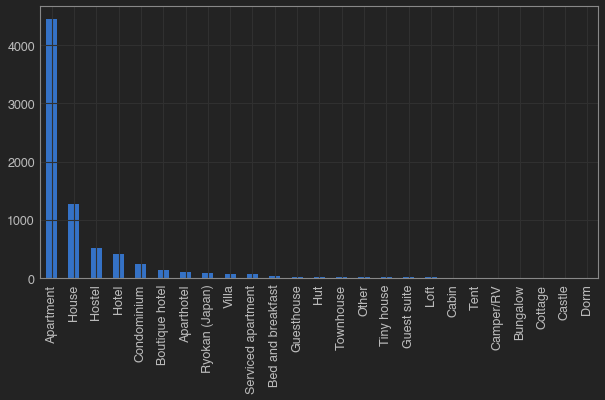

In [53]:
plt.figure(figsize=(10,5))
airbnb["property_type"].value_counts().plot(kind="bar")

Berdasarkan data diatas, keberagaman property sangat banyak. Akan tetapi, ada beberapa yang bisa di kelompokkan seperti House, Townhouse, Tiny house, Guesthouse. Lalu Apartment dengan serviced apartment. Kemudian tent,camper,hut bisa dimasukkan Other. Begitupun dengan yang lain

In [54]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "House" if x=="Townhouse" or x=="Tiny house" or x=="Guesthouse" else x)

In [55]:
sum(airbnb["property_type"] == "Other")

14

In [56]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Apartment" if x=="Serviced apartment" else x)

In [57]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Hotel" if x== "Bed and breakfast" else x)

In [58]:
to_other = []
for x in airbnb["property_type"].unique():
    if sum(airbnb["property_type"] == x) < sum(airbnb["property_type"] == "Other"):
        to_other.append(x)
to_other

['Guest suite',
 'Loft',
 'Tent',
 'Camper/RV',
 'Cabin',
 'Bungalow',
 'Dorm',
 'Cottage',
 'Castle']

In [59]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Other" if x in to_other else x)

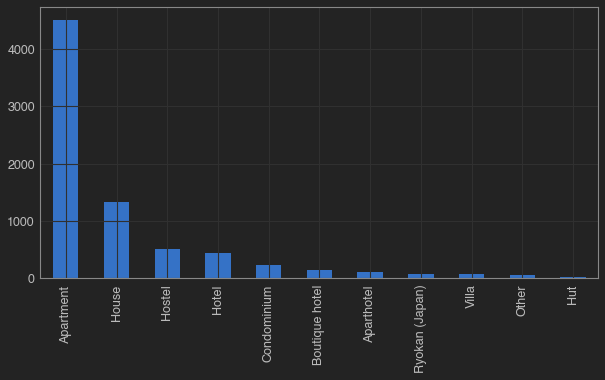

In [60]:
plt.figure(figsize=(10,5))
airbnb["property_type"].value_counts().plot(kind="bar")

In [61]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Other" if x== "Hut" else x)

In [62]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Hotel" if x== "Boutique hotel" else x)

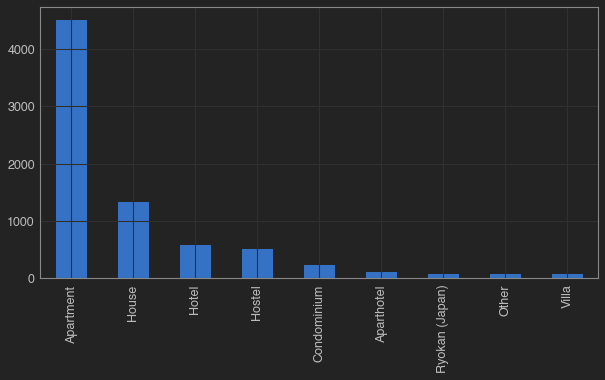

In [63]:
plt.figure(figsize=(10,5))
airbnb["property_type"].value_counts().plot(kind="bar")

In [64]:
airbnb.head()

,host_id,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,license,instant_bookable,cancellation_policy,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people
0,151977,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Shibuya Ku,Apartment,Private room,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...,f,strict_14_with_grace_period,0.165514,8836.0,89,0.693147,0.693147,0.693147,1,100000000.0,8.667826e+07,8.341172,10.308986,8.517393,-1.256477
5,1573631,t,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Setagaya Ku,House,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Other reasons | We called and got confirmation...,f,moderate,0.418710,9216.0,33,0.693147,1.098612,1.098612,3,71639296.0,1.000000e+08,8.981682,10.126671,8.987322,0.231182
6,4799233,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Shinjuku Ku,Apartment,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Other reasons | 【マンスリー契約】最低30泊以上の一時使用賃貸借契約を結びま...,f,moderate,0.717840,8100.0,172,1.386294,1.609438,0.693147,3,100000000.0,1.000000e+08,8.548886,0.000000,8.006701,-1.256477
8,5596383,t,"['email', 'phone', 'reviews', 'manual_offline'...",t,Setagaya Ku,House,Private room,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",M130001107,t,moderate,1.229641,9801.0,2,0.693147,0.693147,0.693147,2,100000000.0,1.000000e+08,8.851950,9.903538,8.294300,1.344410
10,5686404,t,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,Adachi Ku,House,Private room,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",M130007760,f,strict_14_with_grace_period,0.765468,8836.0,92,0.693147,1.098612,0.693147,2,54700816.0,1.000000e+08,8.174139,9.615872,7.601402,0.777596


# ADDING FEATURE

In [65]:
airbnb['neighbourhood_cleansed'].nunique()

51

In [66]:
airbnb.loc[(airbnb['neighbourhood_cleansed'] == 'Shinjuku Ku') | 
           (airbnb['neighbourhood_cleansed'] == 'Taito Ku') | 
           (airbnb['neighbourhood_cleansed'] == 'Toshima Ku') | 
           (airbnb['neighbourhood_cleansed'] == 'Sumida Ku') | 
           (airbnb['neighbourhood_cleansed'] == 'Shibuya Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Minato Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Arakawa Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Nakano Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Ota Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Chuo Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Kita Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Katsushika Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Itabashi Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Setagaya Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Suginami Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Edogawa Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Adachi Ku') ,
           'Posisi'] = 'Dekat'
airbnb.loc[(airbnb['neighbourhood_cleansed'] == 'Chiyoda Ku') | 
           (airbnb['neighbourhood_cleansed'] == 'Koto Ku') | 
           (airbnb['neighbourhood_cleansed'] == 'Kokubunji Shi') | 
           (airbnb['neighbourhood_cleansed'] == 'Shinagawa Ku') | 
           (airbnb['neighbourhood_cleansed'] == 'Bunkyo Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Nerima Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Hachioji Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Meguro Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Machida Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Oshima Machi') |
           (airbnb['neighbourhood_cleansed'] == 'Hino Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Nishitokyo Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Mitaka Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Musashino Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Kunitachi Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Chofu Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Kodaira Shi') ,
           'Posisi'] = 'Menengah'
airbnb.loc[(airbnb['neighbourhood_cleansed'] == 'Higashimurayama Shi') | 
           (airbnb['neighbourhood_cleansed'] == 'Hinohara Mura') | 
           (airbnb['neighbourhood_cleansed'] == 'Tama Shi') | 
           (airbnb['neighbourhood_cleansed'] == 'Ome Shi') | 
           (airbnb['neighbourhood_cleansed'] == 'Okutama Machi') |
           (airbnb['neighbourhood_cleansed'] == 'Hachijo Machi') |
           (airbnb['neighbourhood_cleansed'] == 'Higashikurume Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Miyake Mura') |
           (airbnb['neighbourhood_cleansed'] == 'Inagi Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Akishima Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Niijima Mura') |
           (airbnb['neighbourhood_cleansed'] == 'Koganei Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Fuchu Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Higashiyamato Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Fussa Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Komae Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Musashimurayama Shi') ,
           'Posisi'] = 'Jauh'




In [67]:
airbnbl["host_id"] = airbnbl["host_id"].astype(str)

# ENCODE
https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159



In [68]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['host_id','neighbourhood_cleansed','room_type','property_type','host_identity_verified','host_is_superhost','instant_bookable','Posisi'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [69]:
airbnb=airbnb_en

In [72]:
airbnb.shape

(7526, 25)

## ORDINAL ENCODING


In [74]:
airbnb['cancellation_policy'].unique()

array(['strict_14_with_grace_period', 'moderate', 'flexible', 'strict',
       'super_strict_60', 'super_strict_30'], dtype=object)

In [75]:
airbnb1=airbnb.copy()
cpdictionary = {'strict_14_with_grace_period':0,'moderate':1,'flexible':2,'strict':3,'super_strict_60':4,'super_strict_30':5}
airbnb1['cancellation'] = airbnb1.cancellation_policy.map(cpdictionary)

In [76]:
airbnb1.drop(['cancellation_policy'],axis=1,inplace=True)

In [77]:
airbnb1.head(1)

,host_id,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,license,instant_bookable,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people,Posisi,cancellation
0,0,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,0,0,0,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...,0,0.165514,8836.0,89,0.693147,0.693147,0.693147,1,100000000.0,8.667826e+07,8.341172,10.308986,8.517393,-1.256477,0,0


# FREQUENCY ENCODING
https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

In [78]:
airbnb1['license'].describe()

count                                                  7526
unique                                                 4597
top       Other reasons | 弊社がリスティングする物件につきましては、全て「最低30泊」...
freq                                                     58
Name: license, dtype: object

In [79]:
airbnb2 = airbnb1.copy()
frekuensi = airbnb2.groupby('license').size()/len(airbnb2)
airbnb2['license_'] = airbnb2['license'].map(frekuensi)

In [80]:
airbnb2.drop(['license'],axis=1,inplace=True)

# EXTRACT

In [81]:
airbnb2["amenities"] = airbnb2["amenities"].apply(lambda x: x.strip('{}').replace('"','').split(','))

In [82]:
def item_counter(item):
    count = 0
    for i in airbnb2.index:
        if item in airbnb2["amenities"][i]:
            count += 1
    return count

In [405]:
(item_counter("Heating")/len(airbnb2))*100

82.47408982195057

In [406]:
(item_counter("Washer")/len(airbnb2))*100

83.32447515280361

In [407]:
(item_counter("Wifi")/len(airbnb2))*100

91.74860483656657

In [408]:
(item_counter("Air conditioning")/len(airbnb2))*100

99.22933829391442

In [409]:
(item_counter("Hair dryer")/len(airbnb2))*100

98.77757108689875

In [410]:
(item_counter("Refrigerator")/len(airbnb2))*100

71.57852777039597

In [411]:
(item_counter("Smoke alarm")/len(airbnb2))*100

92.04092479404731

In [412]:
(item_counter("Essentials")/len(airbnb2))*100

96.14669146957215

In [413]:
(item_counter("Kitchen")/len(airbnb2))*100

80.60058463991496

In [414]:
(item_counter("TV")/len(airbnb2))*100

69.58543715120913

In [83]:
airbnb2["heating"] = airbnb2["amenities"].apply(lambda x: int("Heating" in x))
airbnb2["wifi"] = airbnb2["amenities"].apply(lambda x: int("Wifi" in x))
airbnb2["ac"] = airbnb2["amenities"].apply(lambda x: int("Air conditioning" in x))
airbnb2["hairdryer"] = airbnb2["amenities"].apply(lambda x: int("Hair dryer" in x))
airbnb2["refrigerator"] = airbnb2["amenities"].apply(lambda x: int("Refrigerator" in x))
airbnb2["smoke"] = airbnb2["amenities"].apply(lambda x: int("Smoke alarm" in x))
airbnb2["essentials"] = airbnb2["amenities"].apply(lambda x: int("Essentials" in x))
airbnb2["kitchen"] = airbnb2["amenities"].apply(lambda x: int("Kitchen" in x))
airbnb2["washer"] = airbnb2["amenities"].apply(lambda x: int("Washer" in x))
airbnb2["TV"] = airbnb2["amenities"].apply(lambda x: int("TV" in x))
airbnb2["fire_ex"] = airbnb2["amenities"].apply(lambda x: int("Fire extinguisher" in x))
airbnb2["hotwater"] = airbnb2["amenities"].apply(lambda x: int("Hot water" in x))
airbnb2["hanger"] = airbnb2["amenities"].apply(lambda x: int("Hangers" in x))
airbnb2["shampoo"] = airbnb2["amenities"].apply(lambda x: int("Shampoo" in x))

In [84]:
airbnb2["num_amenities"] = airbnb2["amenities"].apply(lambda x: len(x))

In [85]:
airbnb2.drop(columns=["amenities"], inplace=True)

In [86]:
airbnb2.head()

,host_id,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,room_type,instant_bookable,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people,Posisi,cancellation,license_,heating,wifi,ac,hairdryer,refrigerator,smoke,essentials,kitchen,washer,TV,fire_ex,hotwater,hanger,shampoo,num_amenities
0,0,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,0,0,0,0,0.165514,8836.0,89,0.693147,0.693147,0.693147,1,100000000.0,8.667826e+07,8.341172,10.308986,8.517393,-1.256477,0,0,0.000133,1,1,0,1,0,1,1,1,1,1,1,1,0,0,16
5,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,1,1,1,0,0.418710,9216.0,33,0.693147,1.098612,1.098612,3,71639296.0,1.000000e+08,8.981682,10.126671,8.987322,0.231182,0,1,0.000266,1,1,1,1,1,1,1,1,1,1,0,1,1,1,33
6,2,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,2,0,1,0,0.717840,8100.0,172,1.386294,1.609438,0.693147,3,100000000.0,1.000000e+08,8.548886,0.000000,8.006701,-1.256477,0,1,0.000133,0,1,1,1,0,1,1,1,1,1,1,1,1,0,22
8,3,1,"['email', 'phone', 'reviews', 'manual_offline'...",0,1,1,0,1,1.229641,9801.0,2,0.693147,0.693147,0.693147,2,100000000.0,1.000000e+08,8.851950,9.903538,8.294300,1.344410,0,1,0.000133,1,1,1,1,1,1,1,1,1,1,1,1,1,1,36
10,4,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",0,3,1,0,0,0.765468,8836.0,92,0.693147,1.098612,0.693147,2,54700816.0,1.000000e+08,8.174139,9.615872,7.601402,0.777596,0,0,0.000133,1,1,1,1,1,1,1,1,1,1,1,1,1,1,35


In [87]:
airbnb2["host_verifications"] = airbnb2["host_verifications"].apply(lambda x: x.strip('[]').replace("''","").split(','))

In [88]:
airbnb2["num_verifications"] = airbnb2["host_verifications"].apply(lambda x: len(x))

In [89]:
airbnb2.drop(['host_verifications'],axis=1,inplace=True)

In [90]:
airbnb2.drop(['host_id','host_is_superhost','host_identity_verified','host_acceptance_rate','host_response_rate'],axis=1,inplace=True)

In [91]:
airbnb2.head()

,neighbourhood_cleansed,property_type,room_type,instant_bookable,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,price,security_deposit,cleaning_fee,extra_people,Posisi,cancellation,license_,heating,wifi,ac,hairdryer,refrigerator,smoke,essentials,kitchen,washer,TV,fire_ex,hotwater,hanger,shampoo,num_amenities,num_verifications
0,0,0,0,0,0.165514,8836.0,89,0.693147,0.693147,0.693147,1,8.341172,10.308986,8.517393,-1.256477,0,0,0.000133,1,1,0,1,0,1,1,1,1,1,1,1,0,0,16,8
5,1,1,1,0,0.418710,9216.0,33,0.693147,1.098612,1.098612,3,8.981682,10.126671,8.987322,0.231182,0,1,0.000266,1,1,1,1,1,1,1,1,1,1,0,1,1,1,33,10
6,2,0,1,0,0.717840,8100.0,172,1.386294,1.609438,0.693147,3,8.548886,0.000000,8.006701,-1.256477,0,1,0.000133,0,1,1,1,0,1,1,1,1,1,1,1,1,0,22,8
8,1,1,0,1,1.229641,9801.0,2,0.693147,0.693147,0.693147,2,8.851950,9.903538,8.294300,1.344410,0,1,0.000133,1,1,1,1,1,1,1,1,1,1,1,1,1,1,36,10
10,3,1,0,0,0.765468,8836.0,92,0.693147,1.098612,0.693147,2,8.174139,9.615872,7.601402,0.777596,0,0,0.000133,1,1,1,1,1,1,1,1,1,1,1,1,1,1,35,6


# SPLITING

In [92]:
x = airbnb2.drop('price', axis=1)
y = airbnb2['price']
# TRAIN TEST
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [93]:
y_train.head()

8002      8.174139
9755     10.819538
9281      9.272658
12045     9.900884
3252      9.900884
Name: price, dtype: float64

In [94]:
x_train.head()

,neighbourhood_cleansed,property_type,room_type,instant_bookable,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,security_deposit,cleaning_fee,extra_people,Posisi,cancellation,license_,heating,wifi,ac,hairdryer,refrigerator,smoke,essentials,kitchen,washer,TV,fire_ex,hotwater,hanger,shampoo,num_amenities,num_verifications
8002,19,0,0,1,0.431782,8100.0,75,0.693147,1.386294,0.693147,3,9.392745,8.101981,0.728473,0,0,0.000531,0,1,1,1,1,1,1,0,1,0,1,1,1,1,17,7
9755,19,5,0,1,0.953605,9025.0,180,0.693147,1.945910,0.693147,6,9.412200,8.724960,-1.256477,0,1,0.000133,0,1,1,1,0,1,1,1,1,1,1,0,1,1,15,2
9281,2,0,1,1,1.629241,9409.0,4,0.693147,0.693147,0.693147,2,0.000000,8.078998,-1.256477,0,0,0.000133,1,1,1,1,1,1,1,1,1,0,1,1,1,1,23,7
12045,16,1,1,1,0.953605,9025.0,90,2.397895,1.791759,1.791759,10,0.000000,9.903538,0.777596,0,2,0.000133,1,1,1,1,0,1,1,1,1,0,1,0,0,1,14,7
3252,19,0,1,1,1.391282,9216.0,1,1.609438,1.609438,1.098612,7,0.000000,9.082621,0.645474,0,0,0.000133,0,0,1,1,1,1,1,1,1,1,1,1,1,1,26,6


# SCALING

In [95]:
scaler = RobustScaler()

In [96]:
x_train = scaler.fit_transform(x_train)

In [97]:
x_test = scaler.transform(x_test)

# POLYNOMIAL FEATURE
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [98]:
poly = PF(2, include_bias=False)

In [99]:
x_train = poly.fit_transform(x_train)

In [100]:
x_test = poly.transform(x_test)

# LINEAR REGRESSION

In [101]:
LR =LinearRegression()
LR.fit(x_train,y_train)
y_predLR=LR.predict(x_test)
print ("R2 SCORE GIO : ", r2_score(y_test,y_predLR))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_predLR))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_predLR))
print("RMSE SCORE GIO : ",np.sqrt(mean_squared_error(y_test,y_predLR)))

R2 SCORE GIO :  0.49568779522514816
MAE SCORE GIO :  0.4567244364192902
MSE SCORE GIO :  0.4177627030818482
RMSE SCORE GIO :  0.6463456529457348


In [102]:
LRdata = pd.DataFrame({'Actual':y_test, 'Prediction': y_predLR})
LRdata.head(10)

,Actual,Prediction
10000,9.545097,10.110318
2417,8.548886,8.969776
5044,9.473320,9.837377
9496,10.819538,10.525305
6502,10.374616,10.223828
9345,10.128549,9.537538
7087,9.396073,9.335087
4911,9.619200,9.340309
7058,8.415382,9.389521
2432,9.529594,9.462352


In [103]:
LR.coef_

array([-1.38543985e-01, -4.50507486e-02,  8.53227653e-02, -4.30900123e+10,
        1.12023098e-01,  4.39725043e-02, -9.58508663e-02,  1.84764238e-01,
       -2.75111985e-02, -5.75080179e-02,  4.05162513e-01,  7.66820371e-01,
        2.63751030e-01,  3.64987776e-01, -2.99368620e-01, -1.91137254e-01,
       -8.22691917e-02, -1.25419270e+09,  3.16277211e+09,  2.51730758e+09,
        2.92889042e+05,  5.35944182e+08,  9.71127402e+08, -3.44095604e+09,
       -1.35298687e+09, -1.59966467e+09, -3.06154984e+08, -1.32256538e+08,
        4.41883938e+08, -7.52760625e+08,  8.10930750e+07, -3.19658190e-01,
       -5.61472476e-02,  2.69927979e-02, -8.02421570e-03, -8.50558281e-03,
        2.11966515e-01, -5.88130951e-03, -3.80640030e-02,  2.66993046e-02,
       -1.55106187e-02, -5.77629805e-02, -1.15942955e-02,  6.31957054e-02,
       -1.17282867e-02, -5.84125519e-03, -6.38217926e-02,  8.78329277e-02,
       -2.20098495e-02,  6.28557205e-02, -9.25362110e-02,  1.73433304e-01,
       -3.14429775e-01,  

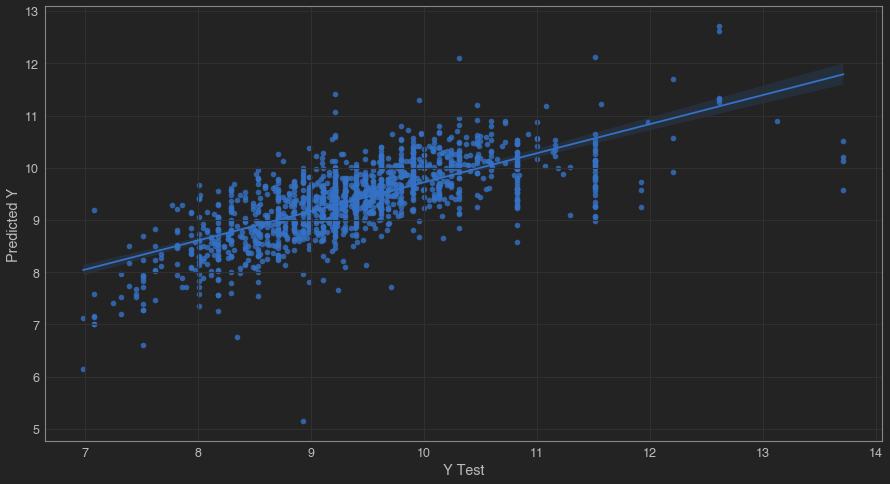

In [104]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_predLR,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# RIDGE

In [105]:
ridge = Ridge()
ridge.fit(x_train,y_train)
y_predridge = ridge.predict(x_test)
print ("R2 SCORE GIO : ", r2_score(y_test,y_predridge))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_predridge))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_predridge))
print("RMSE SCORE GIO : ",np.sqrt(mean_squared_error(y_test,y_predridge)))

R2 SCORE GIO :  0.5065514508192901
MAE SCORE GIO :  0.45314549757438444
MSE SCORE GIO :  0.40876345602141845
RMSE SCORE GIO :  0.6393461159821169


In [106]:
Ridgedata = pd.DataFrame({'Actual':y_test, 'Prediction': y_predridge})
Ridgedata.head(10)

,Actual,Prediction
10000,9.545097,10.123158
2417,8.548886,8.987962
5044,9.473320,9.834814
9496,10.819538,10.540790
6502,10.374616,10.222001
9345,10.128549,9.531589
7087,9.396073,9.319020
4911,9.619200,9.335152
7058,8.415382,9.330760
2432,9.529594,9.436247


In [107]:
ridge.coef_

array([-1.37481791e-01, -4.41794676e-02,  8.70361574e-02, -1.86640633e-02,
        1.11549445e-01,  4.49827107e-02, -9.58068888e-02,  1.85825319e-01,
       -2.69431318e-02, -5.68639517e-02,  4.05081995e-01,  6.33092821e-01,
        2.65451534e-01,  3.51497242e-01, -2.77254383e-01, -1.87153213e-01,
       -8.66533562e-02, -9.97983344e-02,  1.37316972e-02,  5.22205389e-02,
       -5.70769440e-02,  3.18719710e-02,  5.26459936e-02,  2.36801827e-01,
        9.35824533e-02,  5.79665412e-02,  1.16971610e-01,  1.03073684e-01,
       -2.32443379e-02,  2.84669332e-02,  2.62080511e-01, -3.09476227e-01,
       -5.14685731e-02,  2.75294428e-02, -7.35771402e-03, -7.96913419e-03,
        2.09445199e-01, -4.27814943e-03, -3.77687984e-02,  2.61615430e-02,
       -1.18913757e-02, -5.76750520e-02, -1.06047146e-02,  5.97766044e-02,
       -1.26269239e-02, -6.24390611e-03, -6.50077211e-02,  8.59938791e-02,
       -2.36299117e-02,  6.01956084e-02, -8.97654679e-02,  1.72024630e-01,
       -4.15108570e-01,  

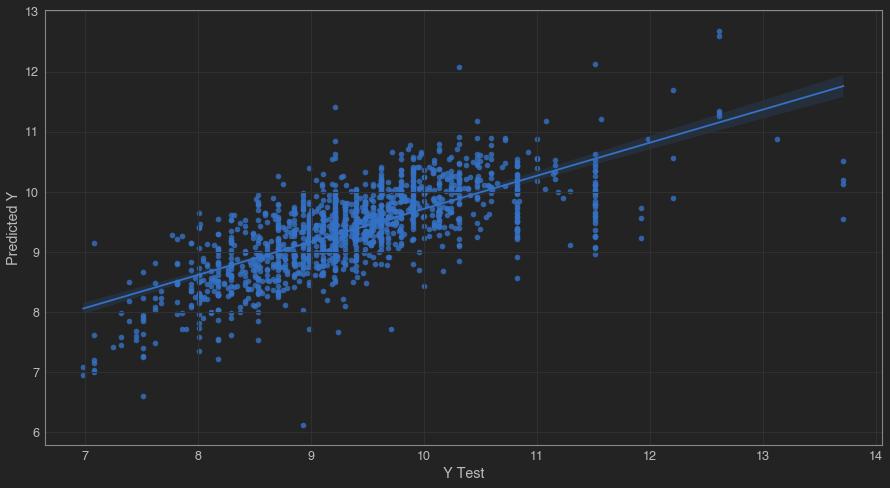

In [108]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_predridge,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# ELASTIC NET

In [109]:
EN = ElasticNetCV()
EN.fit(x_train,y_train)
y_predEN = EN.predict(x_test)
print ("R2 SCORE GIO : ", r2_score(y_test,y_predEN))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_predEN))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_predEN))
print("RMSE SCORE GIO : ",np.sqrt(mean_squared_error(y_test,y_predEN)))

R2 SCORE GIO :  0.46594042455295037
MAE SCORE GIO :  0.4591510252120583
MSE SCORE GIO :  0.44240486296600806
RMSE SCORE GIO :  0.6651352215647642


In [110]:
Ridgedata = pd.DataFrame({'Actual':y_test, 'Prediction': y_predEN})
Ridgedata.head(10)

,Actual,Prediction
10000,9.545097,10.337372
2417,8.548886,9.178730
5044,9.473320,9.841728
9496,10.819538,10.133842
6502,10.374616,9.956570
9345,10.128549,9.702239
7087,9.396073,9.233831
4911,9.619200,9.322596
7058,8.415382,9.207153
2432,9.529594,9.135530


In [111]:
EN.coef_

array([-2.89361510e-02, -3.60557798e-02,  0.00000000e+00,  0.00000000e+00,
        3.50541354e-02,  5.54062440e-02, -8.57811372e-03,  1.57944794e-01,
       -0.00000000e+00, -0.00000000e+00,  4.03864644e-01, -0.00000000e+00,
        2.60143592e-01, -0.00000000e+00, -4.96066581e-02, -5.15621975e-02,
       -3.59349652e-02, -8.74478548e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -4.94756288e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.66996322e-02,  7.33042819e-03,
       -4.05250262e-04,  0.00000000e+00,  2.60127236e-02, -2.83093135e-02,
       -5.33538144e-02, -0.00000000e+00, -1.31766327e-02,  0.00000000e+00,
        1.21442018e-01,  6.97603823e-03, -2.00673861e-02,  0.00000000e+00,
       -1.10459551e-02, -1.11390139e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.74473257e-03, -4.83631069e-03,  0.00000000e+00,
       -0.00000000e+00,  4.04314724e-02, -1.19730115e-03,  0.00000000e+00,
       -0.00000000e+00,  

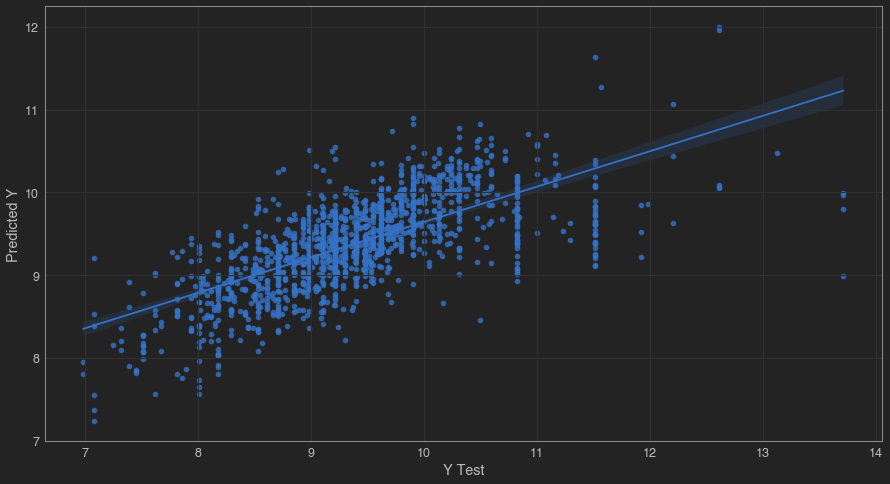

In [112]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_predEN,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# RANDOM FOREST

In [113]:
forest = RandomForestRegressor()
forest = forest.fit(x_train, y_train)
y_test_predf = forest.predict(x_test)
print('R2 SCORE GIO : ',(r2_score(y_test, y_test_predf)))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_test_predf))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_test_predf))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(y_test,y_test_predf))))

R2 SCORE GIO :  0.7037681039941105
MAE SCORE GIO :  0.3211098640621698
MSE SCORE GIO :  0.24539290630440147
RMSE SCORE GIO :  0.4953714831360415


In [114]:
RFdata = pd.DataFrame({'Actual':y_test, 'Prediction': y_test_predf})
RFdata.head(10)

,Actual,Prediction
10000,9.545097,9.985926
2417,8.548886,9.161503
5044,9.473320,10.006613
9496,10.819538,10.341541
6502,10.374616,10.057665
9345,10.128549,9.861476
7087,9.396073,9.323894
4911,9.619200,9.303182
7058,8.415382,9.422506
2432,9.529594,9.351680


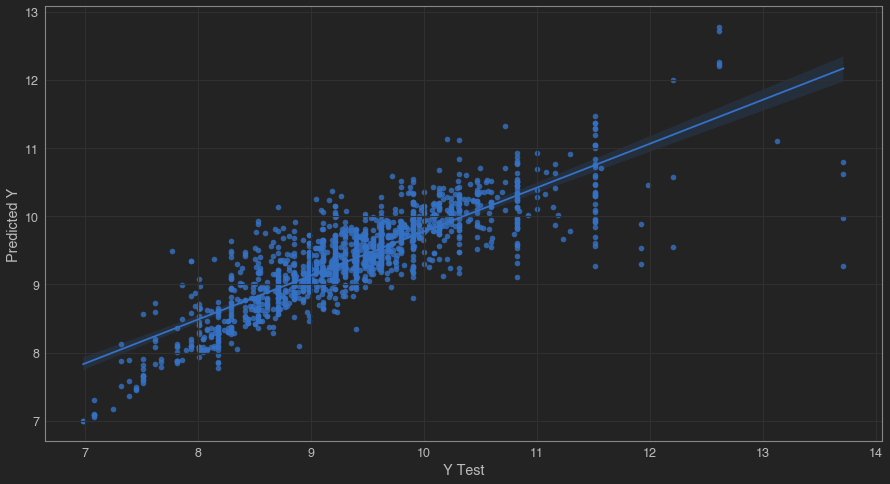

In [115]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_test_predf,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# GRADIENT BOOST

In [116]:
gradient = GradientBoostingRegressor()
gradient = gradient.fit(x_train, y_train)
y_train_g = gradient.predict(x_train)
y_test_g = gradient.predict(x_test)
print('R2 SCORE GIO : ',(r2_score(y_test, y_test_g)))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_test_g))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_test_g))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(y_test,y_test_g))))

R2 SCORE GIO :  0.5968761510459673
MAE SCORE GIO :  0.3958244447331931
MSE SCORE GIO :  0.33394018074772047
RMSE SCORE GIO :  0.5778755754898458


In [117]:
gradientdata = pd.DataFrame({'Actual':y_test, 'Prediction': y_test_g})
gradientdata.head(5)

,Actual,Prediction
10000,9.545097,9.968233
2417,8.548886,9.024797
5044,9.473320,9.895403
9496,10.819538,10.003146
6502,10.374616,10.016803


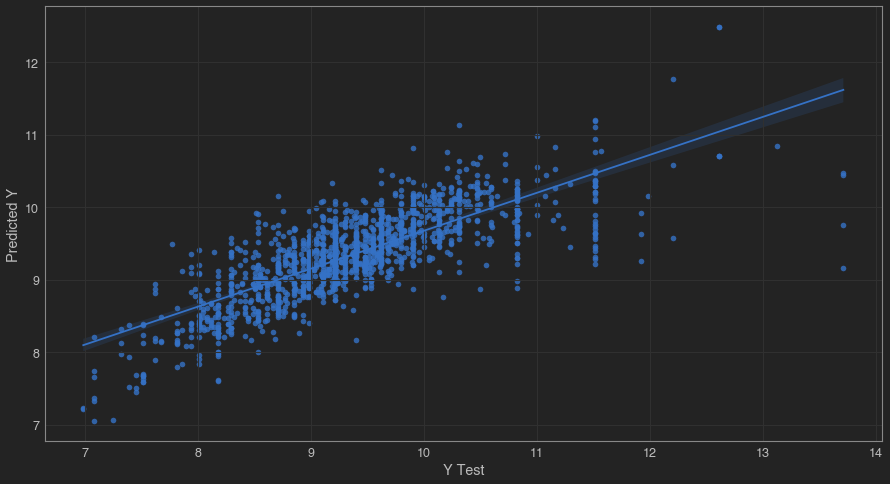

In [118]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_test_g,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# KNeighborsRegressor

In [119]:
KNN = KNeighborsRegressor()
KNN = KNN.fit(x_train, y_train)
y_train_K = KNN.predict(x_train)
y_test_K = KNN.predict(x_test)
print('R2 SCORE GIO : ',(r2_score(y_test, y_test_K)))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_test_K))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_test_K))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(y_test,y_test_K))))

R2 SCORE GIO :  0.5885406566368834
MAE SCORE GIO :  0.37510591230097545
MSE SCORE GIO :  0.3408451468439051
RMSE SCORE GIO :  0.5838194471271962


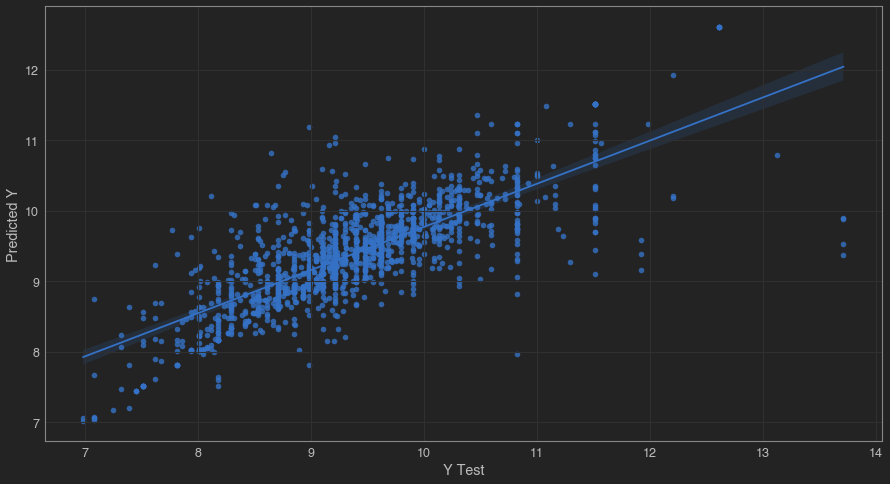

In [120]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_test_K,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# XGBRegressor

In [121]:
xgb = XGBRegressor()
xgb = xgb.fit(x_train, y_train)
y_train_xgb = xgb.predict(x_train)
y_test_xgb = xgb.predict(x_test)
print('R2 SCORE GIO : ',(r2_score(y_test, y_test_xgb)))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_test_xgb))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_test_xgb))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(y_test,y_test_xgb))))

R2 SCORE GIO :  0.6917225530044937
MAE SCORE GIO :  0.34483442850466217
MSE SCORE GIO :  0.2553712131823387
RMSE SCORE GIO :  0.5053426690695519


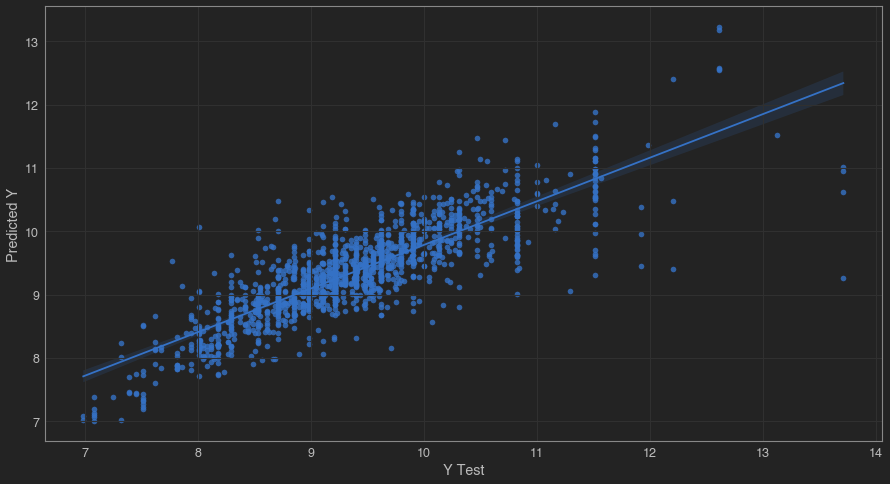

In [122]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_test_xgb,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()